# Market Basket Analysis

By using `Association rules` derived from `frequent itemsets` identified by `Apriori`, Market Basket Analysis helps retailers discover hidden patterns in customer buying habits, leading to better product placement, targeted promotions, and improved inventory management.

I will use the **[Online Retail Dataset](https://archive.ics.uci.edu/dataset/352/online+retail)** from UCI machine learning repository

These are the steps I will follow:

1. Number of Transactions by Country
2. Working with Transactions from France
3. Binary Encoding
4. Training the Model
5. Making Recommendations

***I'll briefly explain Association rules and the Apriori algorithm. If you're already familiar with these concepts, you can skip ahead.***

## Association Rules:

Imagine a grocery store. An association rule might state: "If a customer buys bread, then they are also likely to buy butter." This rule captures the relationship between frequently bought together items.

Association rules are written in the format A -> B, where A (antecedent) is the item purchased first and B (consequent) is the item purchased together with A.

## Apriori:

The Apriori algorithm efficiently finds frequently bought together items (itemsets) in your transaction data. `mlxtend` library provides a user-friendly implementation. You simply:

* Set Minimum Support: Define the minimum number of times an itemset needs to appear to be considered frequent (e.g., 10% of transactions).
* Run Apriori: Use `mlxtend.frequent_patterns.apriori` on your transaction data.
* Get Frequent Itemsets: Apriori identifies groups of items (bread & butter, milk & cereal) that frequently appear together, exceeding the minimum support threshold.

## Interpreting the results 

Choosing the Right Metric:

1. `Support`: A good starting point to identify frequently bought-together itemsets.
2. `Confidence`: Helps refine the analysis by focusing on how likely B is purchased with A.
3. `Lift`: Measures how much more likely it is to buy B given A compared to buying them independently. A higher lift indicates a stronger association.

In essence:

1. Use higher support to identify commonly purchased itemsets.
2. Use higher confidence to identify strong conditional relationships between items.
3. Use higher lift to identify itemsets where co-purchases are more frequent than expected by chance.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Load Dataset
retail = pd.read_excel('/kaggle/input/online-retail-data/Online Retail.xlsx')
df = retail.copy() # make a copy of the dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Cleaning

In [3]:
df.info() # 541,909 rows and 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Percentage of Missing values
(df.isnull().mean()*100).round(1)

InvoiceNo       0.0
StockCode       0.0
Description     0.3
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     24.9
Country         0.0
dtype: float64

In [5]:
# Inspect the rows with missing values in 'Description' column
missing_descriptions = df['Description'].isnull()
missing_data = df[missing_descriptions]
missing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [6]:
#  Remove any rows from df where the 'Description' value is missing
df = df.dropna(axis = 0, subset = ['Description'])

# Percentage of Missing values
(df.isnull().mean()*100).round(1)

InvoiceNo       0.0
StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     24.7
Country         0.0
dtype: float64

In [7]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str') #converting invoice number to be string
df = df[~df['InvoiceNo'].str.contains('C')] #remove the credit transactions 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1. Number of Transactions by Country

In [8]:
df['Country'].value_counts()

Country
United Kingdom          486168
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


# 2. Working with Transactions from France

In [9]:
# Filter dataframe and select transactions where 'Country' is 'France'
# Groups transactions based on 'InvoiceNo', then by 'Description'
# Within each group, calculate the total 'Quantity' of each product (identified by description) purchased in each 'InvoiceNo'.
france_basket = df[df['Country'] =='France'] \
               .groupby(['InvoiceNo','Description'])['Quantity'] \
               .sum().unstack().reset_index().fillna(0) \
               .set_index('InvoiceNo')

print(france_basket.shape)  # (392 rows and 1564 columns)
print() # blank line
france_basket.head()

(392, 1564)



Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Binary Encoding

***Focus on Presence/Absence***: The function encodes positive values (indicating a purchase) to True, essentially signifying the item's presence in the transaction.

***Handling Non-Positive Values***: It encodes everything less than or equal to 0 (including 0) to False, representing the item's absence in the transaction.

Focusing on presence/absence simplifies market basket analysis by focusing on co-occurrence patterns, not quantities.

In [10]:
def my_encode_units(x):
  """Converts positive values to True and everything else to False."""
  return x > 0  # This returns True for positive values and False otherwise

my_basket_sets = france_basket.map(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) # Remove "postage" as an item
my_basket_sets.dtypes.head()  # boolean datatype

Description
50'S CHRISTMAS GIFT BAG LARGE      bool
DOLLY GIRL BEAKER                  bool
I LOVE LONDON MINI BACKPACK        bool
NINE DRAWER OFFICE TIDY            bool
SET 2 TEA TOWELS I LOVE LONDON     bool
dtype: object

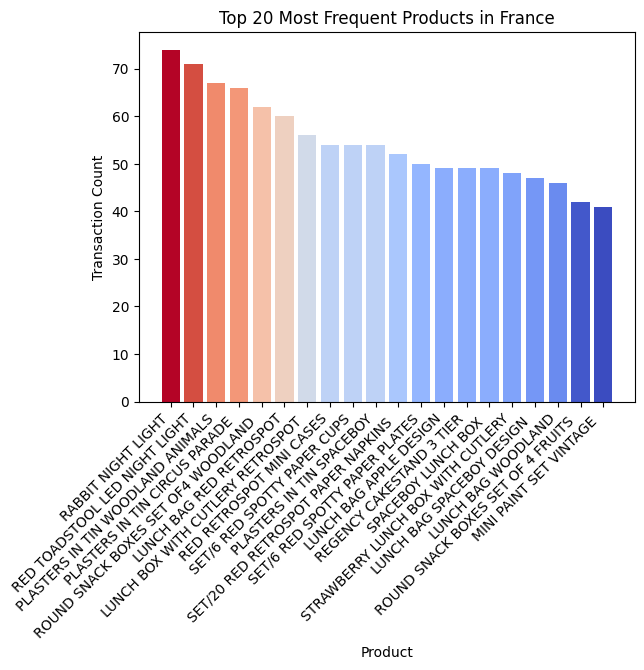

In [11]:
# Use this to count the Transactions per Product (in this case 'Description')
transaction_counts = my_basket_sets.sum(axis=0)  

top_20_products = transaction_counts.sort_values(ascending=False).head(20)  # Get top 20 by count

# Create a bar chart with Matplotlib
import matplotlib.cm as cm

# Define a colormap (you can choose a different colormap from 'coolwarm')
cmap = cm.coolwarm

# Normalize the data values for the colormap (optional)
norm = plt.Normalize(top_20_products.min(), top_20_products.max())

# Create the bar chart with colormap
plt.bar(top_20_products.index, top_20_products.values, color=cmap(norm(top_20_products.values)))
plt.title('Top 20 Most Frequent Products in France')
plt.xlabel('Product')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
plt.show()

# 4. Training the Model

Adjust the min_support value if you want to. You will see different results.

`min_support=0.05`: This parameter sets the minimum support threshold. Here, it means an itemset needs to appear in at least 5% of transactions to be considered frequent.

A higher support value like 10% gives less rules while a lower one like 1% gives more than 6,000 rules!

In [12]:
# Generate frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.05, use_colnames=True)

# Generate rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

print(my_rules.shape) # 86 rows so 86 association rules

# View first 10 rules
my_rules.head(10)

(86, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
6,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ALARM CLOCK BAKELIKE RED ),0.158163,0.094388,0.051020,0.322581,3.417611,0.036092,1.336856,0.840303
7,(ALARM CLOCK BAKELIKE RED ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.094388,0.158163,0.051020,0.540541,3.417611,0.036092,1.832233,0.781127
8,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476,0.993846
9,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714,0.991123


# 5. Making Recommendations

You can sort the rules in descending order by `Lift` and make relevant recommendations. Also consider the `support` and `confidence` values.

In [13]:
# Sort by lift (highest first)
sorted_lift_rules = my_rules.sort_values(by='lift', ascending=False)
sorted_lift_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.063776,0.056122,0.051020,0.800000,14.254545,0.047441,4.719388,0.993188
38,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,0.047441,10.298469,0.985135
9,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714,0.991123
8,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476,0.993846
68,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED ),0.073980,0.094388,0.063776,0.862069,9.133271,0.056793,6.565689,0.961653
73,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.094388,0.073980,0.063776,0.675676,9.133271,0.056793,2.855230,0.983324
69,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE GREEN),0.073980,0.096939,0.063776,0.862069,8.892922,0.056604,6.547194,0.958457
72,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.096939,0.073980,0.063776,0.657895,8.892922,0.056604,2.706829,0.982825
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224


## Strong Co-occurrence of Party Supplies

Looking at the first two rules:

* Both rules involve "PACK OF 6 SKULL PAPER CUPS" and "PACK OF 6 SKULL PAPER PLATES" with the same support value (0.051020) and lift value (14.254545)
* `Lift: Highlighting a Non-Random Relationship`
* A lift value greater than 1 indicates a positive association, but a value this high (14.25) suggests a very **strong, non-random relationship** between the two products.

These rules highlight a strong co-occurrence pattern between the two skull-themed party supplies, indicating that customers who buy one item are very likely to also buy the other.  Here's how a **Store manager can leverage this information**:

1. **Strategic Product Placement**: Consider recommending "PACK OF 6 SKULL PAPER PLATES" next to "PACK OF 6 SKULL PAPER CUPS". This close proximity can create a visual reminder for customers browsing either product, potentially leading to impulse purchases of the complementary item (cups if looking at plates, and vice versa).

2.  **Ensure Adequate Stock**: Given the high confidence values (especially the 90.9% confidence for plates leading to cups), it's crucial to ensure the store has sufficient stock of both products to meet this customer demand. Running out of either product could lead to lost sales opportunities.

3.  **Bundled Promotions**: While the co-occurrence is strong, you might consider a bundled promotion (e.g., "Party Pack: Skull Paper Cups & Plates") to further incentivize customers to buy both items together. However, analyse your profit margins before implementing this strategy.

## Product-Specific Recommendations

This section is relevant if you want to see rules on **Specific products** and make Recommendations based on the `support`, `confidence` and `lift` values.

In [14]:
# Join list elements with comma. Helps when converting to string datatype
my_rules['antecedents_str'] = my_rules['antecedents'].apply(lambda x: ','.join(x))  
my_rules['consequents_str'] = my_rules['consequents'].apply(lambda x: ','.join(x))

In [15]:
# Example on 'ALARM CLOCK BAKELIKE RED' as the consequent
alarm_clock_red = my_rules[my_rules['consequents_str'].str.contains("ALARM CLOCK BAKELIKE RED")]  # replace with any product
alarm_clock_red.head()

# # Uncomment this code if you want 'ALARM CLOCK BAKELIKE RED' as the antecedent
# alarm_red = my_rules[my_rules['antecedents_str'].str.contains("ALARM CLOCK BAKELIKE RED")]  # replace with any product
# alarm_red.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_str,consequents_str
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED
6,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ALARM CLOCK BAKELIKE RED ),0.158163,0.094388,0.051020,0.322581,3.417611,0.036092,1.336856,0.840303,ROUND SNACK BOXES SET OF4 WOODLAND,ALARM CLOCK BAKELIKE RED
68,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED ),0.073980,0.094388,0.063776,0.862069,9.133271,0.056793,6.565689,0.961653,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE...",ALARM CLOCK BAKELIKE RED
71,(ALARM CLOCK BAKELIKE PINK),"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",0.102041,0.079082,0.063776,0.625000,7.903226,0.055706,2.455782,0.972727,ALARM CLOCK BAKELIKE PINK,"ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIK..."


## Strong Association for "ALARM CLOCK BAKELIKE RED"

The rule suggests a strong association between buying "ALARM CLOCK BAKELIKE GREEN" or "ALARM CLOCK BAKELIKE PINK" (antecedents) and also buying "ALARM CLOCK BAKELIKE RED" (consequent)

1. **Support** (0.0638): This indicates that out of all transactions, approximately 6.4% involved customers buying at least one of the green or pink alarm clocks along with the red alarm clock.

1. **Confidence** (0.862): If a customer buys "ALARM CLOCK BAKELIKE GREEN" or "ALARM CLOCK BAKELIKE PINK", there's an 86.2% chance they also purchase the "ALARM CLOCK BAKELIKE RED". This suggests a strong tendency for customers who like these similar alarm clocks to also consider the red one.

1. **Lift** (9.13): This is the most crucial metric. A lift value this high (over 9) signifies that customers who buy the green or pink clocks are 9.13 times more likely to also buy the red clock compared to if they hadn't purchased the green or pink ones. This indicates a very strong, non-random association.

Recommendation:

* **Cross-Selling**: The store manager should focus on cross-selling the "ALARM CLOCK BAKELIKE RED" whenever a customer shows interest in or purchases either the green or pink version.

* **Visual Merchandising**: Consider creating an eye-catching display that showcases all three alarm clock colors together. This can further emphasize the color options and potentially encourage indecisive customers to buy more than one.

* **Inventory Management**: Ensure there's adequate stock of all three colored alarm clocks, especially the red one, given the high likelihood of customers buying it alongside the green or pink versions.

Feel free to perform further datetime-specific analyses and transactions in other Countries.

***Explore and be teachable***